In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv

from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from scipy.stats import threshold

In [2]:
img_width, img_height = 224, 224
batch_size = 16
test_data_dir = 'data/test'
model_name = 'minnet'
print(os.getcwd())

/home/ryan/ai/tensorflow/dogcat


In [37]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 12500 images belonging to 1 classes.


In [38]:
ordered = []
for i in range(1,12501):
    ordered.append(f"testdata/{i}.jpg")

test_generator.filenames = ordered
test_generator.filenames

['testdata/1.jpg',
 'testdata/2.jpg',
 'testdata/3.jpg',
 'testdata/4.jpg',
 'testdata/5.jpg',
 'testdata/6.jpg',
 'testdata/7.jpg',
 'testdata/8.jpg',
 'testdata/9.jpg',
 'testdata/10.jpg',
 'testdata/11.jpg',
 'testdata/12.jpg',
 'testdata/13.jpg',
 'testdata/14.jpg',
 'testdata/15.jpg',
 'testdata/16.jpg',
 'testdata/17.jpg',
 'testdata/18.jpg',
 'testdata/19.jpg',
 'testdata/20.jpg',
 'testdata/21.jpg',
 'testdata/22.jpg',
 'testdata/23.jpg',
 'testdata/24.jpg',
 'testdata/25.jpg',
 'testdata/26.jpg',
 'testdata/27.jpg',
 'testdata/28.jpg',
 'testdata/29.jpg',
 'testdata/30.jpg',
 'testdata/31.jpg',
 'testdata/32.jpg',
 'testdata/33.jpg',
 'testdata/34.jpg',
 'testdata/35.jpg',
 'testdata/36.jpg',
 'testdata/37.jpg',
 'testdata/38.jpg',
 'testdata/39.jpg',
 'testdata/40.jpg',
 'testdata/41.jpg',
 'testdata/42.jpg',
 'testdata/43.jpg',
 'testdata/44.jpg',
 'testdata/45.jpg',
 'testdata/46.jpg',
 'testdata/47.jpg',
 'testdata/48.jpg',
 'testdata/49.jpg',
 'testdata/50.jpg',
 'testdat

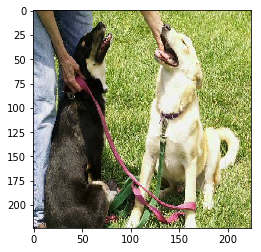

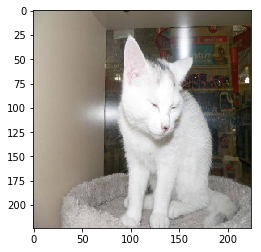

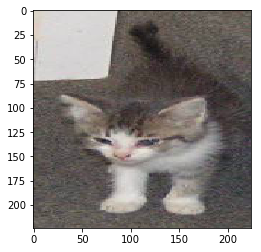

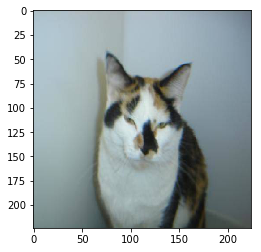

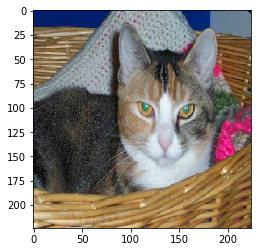

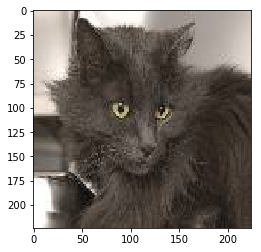

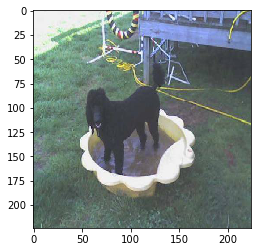

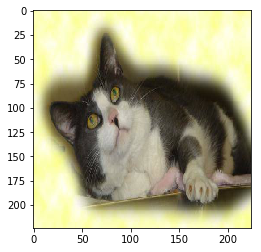

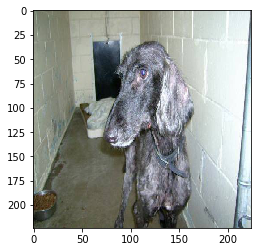

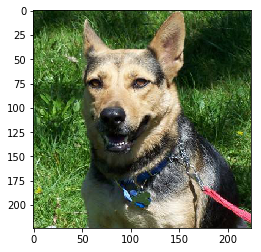

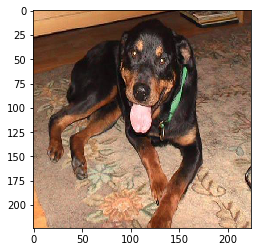

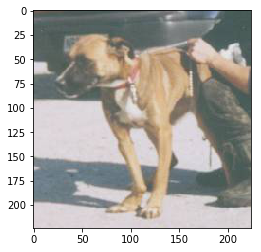

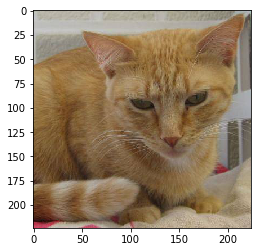

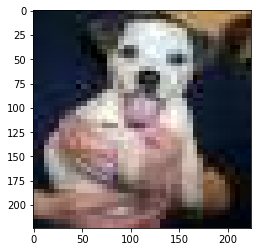

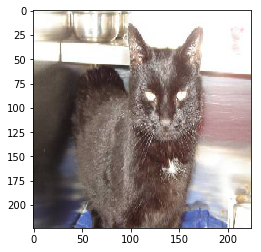

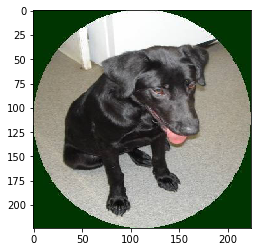

In [36]:
batch = test_generator.next()

for img in batch:
    plt.imshow(img)
    plt.show()


In [39]:
model = load_model(f"weights/{model_name}.h5")

In [54]:
rawpred = model.predict_generator(test_generator, steps=None)

In [55]:
rawpred = rawpred.flatten()
len(rawpred)

320

In [57]:
pred = rawpred
pred[pred < 0.4999999999999] = 0
pred[pred > 0.50] = 1
pred

array([ 0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1

In [59]:
with open(f"predictions/{model_name}_predictions.csv", 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["id", "label"])
    for i, v in enumerate(pred):
        writer.writerow([i+1, v])